This file was used to generate the results for all embeddings, weights and baselines for the given dataset.

In [1]:
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import networkx as nx
from interactive_layout import InteractiveLayout, get_crossings, get_occlusions

In [2]:
json_path = './Data/miserables.json'
with open(json_path) as f:
    json_data = json.load(f)
    
nodes = pd.json_normalize(json_data['nodes'])
nodes = nodes.rename(columns={"group": "label"})
edges = pd.json_normalize(json_data['links'])
edges = edges.rename(columns={"value": "weight"})
nr_nodes = len(nodes)
nr_edges = len(edges)

# TSNE

In [3]:
my_layout = InteractiveLayout(nodes = nodes, edges = edges, method="TSNE")

In [4]:
my_layout.draw()

interactive(children=(IntSlider(value=50, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function interactive_layout.InteractiveLayout.draw.<locals>.f(x)>

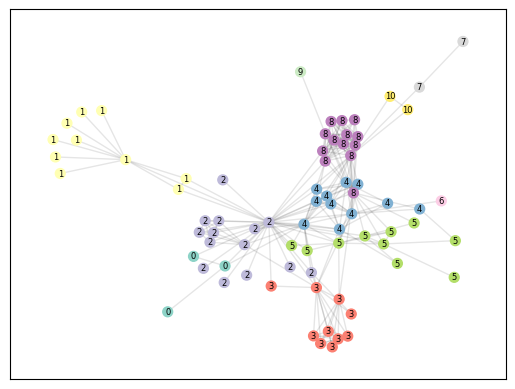

In [8]:
labels = dict(zip(my_layout.nodes.id, my_layout.nodes.label))
nx.draw_networkx_nodes(my_layout.graph, pos=my_layout.positions[70], node_size=50, node_color=my_layout.nodes['label'], 
                 cmap='Set3')
nx.draw_networkx_labels(my_layout.graph, pos=my_layout.positions[70], labels=labels, font_size=6)
nx.draw_networkx_edges(my_layout.graph, pos=my_layout.positions[70], alpha=0.1)
plt.savefig('./imgs/results/miserables/tsne70_936_12.jpg')

# UMAP

In [9]:
umap_layout = InteractiveLayout(nodes = nodes, edges = edges, method="UMAP")

In [10]:
umap_layout.draw()

interactive(children=(IntSlider(value=50, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function interactive_layout.InteractiveLayout.draw.<locals>.f(x)>

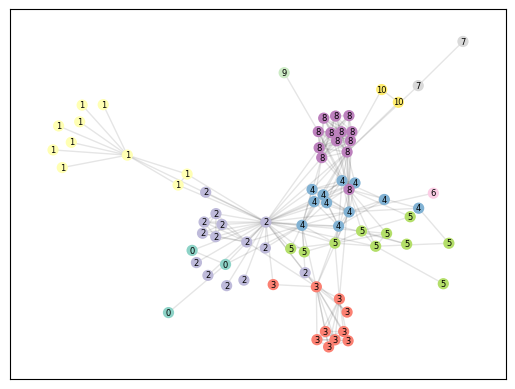

In [15]:
w = 70
labels = dict(zip(umap_layout.nodes.id, umap_layout.nodes.label))
nx.draw_networkx_nodes(umap_layout.graph, pos=umap_layout.positions[w], node_size=50, node_color=umap_layout.nodes['label'], 
                 cmap='Set3')
nx.draw_networkx_labels(umap_layout.graph, pos=umap_layout.positions[w], labels=labels, font_size=6)
nx.draw_networkx_edges(umap_layout.graph, pos=umap_layout.positions[w], alpha=0.1)
plt.savefig('./imgs/results/miserables/umap{}_934_9.jpg'.format(w))

# node2vec

In [16]:
node2vec_layout = InteractiveLayout(nodes = nodes, edges = edges, method="node2vec")

Computing transition probabilities:   0%|          | 0/88 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 150/150 [00:03<00:00, 38.66it/s]


In [17]:
node2vec_layout.draw()

interactive(children=(IntSlider(value=50, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function interactive_layout.InteractiveLayout.draw.<locals>.f(x)>

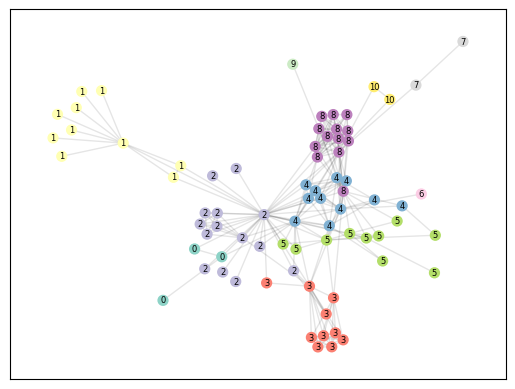

In [21]:
w = 70
labels = dict(zip(node2vec_layout.nodes.id, node2vec_layout.nodes.label))
nx.draw_networkx_nodes(node2vec_layout.graph, pos=node2vec_layout.positions[w], node_size=50, node_color=node2vec_layout.nodes['label'], 
                 cmap='Set3')
nx.draw_networkx_labels(node2vec_layout.graph, pos=node2vec_layout.positions[w], labels=labels, font_size=6)
nx.draw_networkx_edges(node2vec_layout.graph, pos=node2vec_layout.positions[w], alpha=0.1)
plt.savefig('./imgs/results/miserables/node2vec{}_923_10.jpg'.format(w))

# Baseline FR

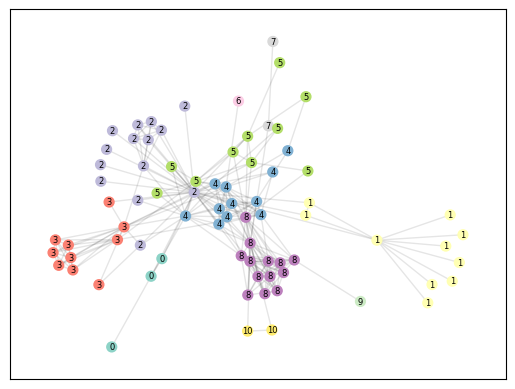

In [25]:
labels = dict(zip(nodes.id, nodes.label))
G = nx.from_pandas_edgelist(edges, 'source', 'target', 'weight')
np.random.seed(4040)
fr_pos=nx.fruchterman_reingold_layout(G)

nx.draw_networkx_nodes(G, pos=fr_pos, node_size=50, node_color=nodes['label'], 
                 cmap='Set3')
nx.draw_networkx_labels(G, pos=fr_pos, labels=labels, font_size=6)
nx.draw_networkx_edges(G, pos=fr_pos, alpha=0.1)

plt.savefig('./imgs/results/miserables/baseline_fr.jpg')

In [23]:
edge_list = list(G.edges)
get_crossings(fr_pos, nr_edges, edge_list)

1041

In [24]:
get_occlusions(fr_pos, nr_nodes)

6

# Force then embed

In [28]:
np.random.seed(4040)
embeddings = TSNE(n_components=2, init=np.array(list(fr_pos.values()))).fit_transform(nodes.drop('id', axis=1))

embedding_pos = {}
for i, name in enumerate(nodes['id']):
    embedding_pos[name] = embeddings[i]

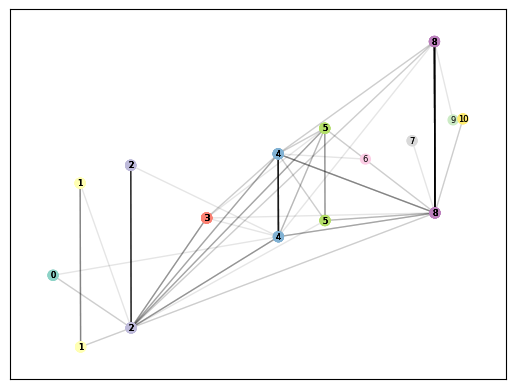

In [29]:
nx.draw_networkx_nodes(G, pos=embedding_pos, node_size=50, node_color=nodes['label'], 
                 cmap='Set3')
nx.draw_networkx_labels(G, pos=embedding_pos, labels=labels, font_size=6)
nx.draw_networkx_edges(G, pos=embedding_pos, alpha=0.1)
plt.savefig('./imgs/results/miserables/baseline_fr_embed.jpg')

In [30]:
get_crossings(embedding_pos, nr_edges, edge_list)

1619

In [31]:
get_occlusions(embedding_pos, nr_nodes)

193

# Embed then force

In [35]:
np.random.seed(4040)
embeddings = TSNE(n_components=2, init="random").fit_transform(nodes.drop('id', axis=1))

embedding_pos = {}
for i, name in enumerate(nodes['id']):
    embedding_pos[name] = embeddings[i]

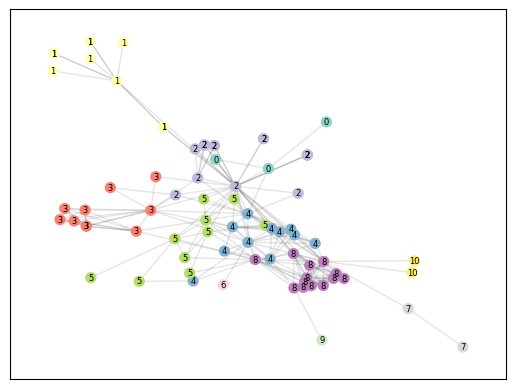

In [36]:
np.random.seed(4040)
pos=nx.fruchterman_reingold_layout(G, pos=embedding_pos, iterations = 50)
nx.draw_networkx_nodes(G, pos=pos, node_size=50, node_color=nodes['label'], 
                 cmap='Set3')
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=6)
nx.draw_networkx_edges(G, pos=pos, alpha=0.1)
plt.savefig('./imgs/results/miserables/baseline_embed_fr.jpg')

In [37]:
get_crossings(pos, nr_edges, edge_list)

843

In [38]:
get_occlusions(pos, nr_nodes)

38